In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
# Перша частина завдання - обробка датасету data_2d
# Шлях до zip-файлу
zip_path = "C:\\Users\\Igor\\Downloads\\data.zip"
extract_folder = '/new/data'#Тут можете залишити усе без змі

# Розпакування файл
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Список файлів у розпакованій папці
extracted_files = os.listdir(extract_folder)
extracted_files[0]

'data'

In [7]:
# Перерахування файлів в папці "data".
data_folder_path = os.path.join(extract_folder, extracted_files[0])
data_folder_path

'/new/data\\data'

In [12]:
data_files = os.listdir(data_folder_path)
data_files

['data_2d.csv', 'mnist.csv']

In [18]:
# Зчитуємо дані з файлу
file_path = os.path.join(data_folder_path, data_files[0])
data = pd.read_csv(file_path)
data

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [27]:
import numpy as np
from sklearn.cluster import KMeans
import warnings
os.environ["OMP_NUM_THREADS"] = "1"  # усуваємо проблему у використанні KMeans з пам'яттю на Windows з MKL
                                    # (Math Kernel Library), коли кількість частин даних менша, ніж кількість доступних потоків
                                    # використання лише одного потоку зменшить ймовірність витоку пам'яті

# Встановлюємо рівень журналювання на 'ignore'
warnings.filterwarnings('ignore')

# Перетворюємо дані у масив NumPy
X = data.values
X

array([[ 0.00000000e+00,  2.68784756e+00,  2.36696066e+00],
       [ 0.00000000e+00, -2.01379356e-01,  4.70429935e-01],
       [ 0.00000000e+00,  6.08495680e-01,  1.22540003e+00],
       [ 0.00000000e+00, -8.22819045e-02,  1.13721812e+00],
       [ 0.00000000e+00,  2.08306930e+00,  2.69448209e+00],
       [ 0.00000000e+00,  1.50301985e+00,  1.07484727e+00],
       [ 0.00000000e+00,  3.91662001e-01, -2.87497166e-01],
       [ 0.00000000e+00,  3.21377111e-01,  1.29674301e+00],
       [ 0.00000000e+00,  5.91248258e-01,  1.26716412e-01],
       [ 0.00000000e+00,  1.15057763e+00, -2.66403844e-01],
       [ 0.00000000e+00,  9.42586669e-01,  8.67662423e-01],
       [ 0.00000000e+00,  1.35780613e+00,  1.80547155e+00],
       [ 0.00000000e+00,  1.16291991e+00,  2.62243013e+00],
       [ 0.00000000e+00, -9.78685124e-02,  1.01230581e+00],
       [ 0.00000000e+00,  8.57774175e-01,  1.03196525e+00],
       [ 0.00000000e+00,  6.83436732e-01,  1.57813996e-02],
       [ 0.00000000e+00,  1.54377185e+00

In [28]:
# Збережемо суму квадратів відстаней для різної кількості кластерів
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
sse

[858.9645417636821,
 362.7751486474809,
 281.3907946255924,
 217.25229624975307,
 178.68609311098126,
 147.56967747574484,
 130.4676368005486,
 115.546926362676,
 103.42795579571238,
 94.14124444150173]

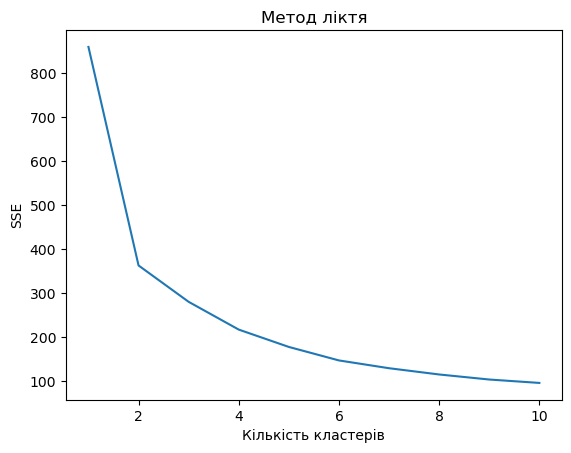

In [26]:
# Побудуємо графік методу ліктя
plt.plot(range(1, 11), sse)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')  # SSE - сума квадратів відстаней
plt.show()

Оптимальна кількість кластерів, згідно з ліктевим методом, для датасету data_2d буде дорівнювати 2 (в цьому випадку сума квадратів відстаней SSE = 362.7751486474809

In [34]:
from sklearn.decomposition import PCA
# Друга частина завдання - обробка датасету mnist
# Зчитуємо дані з файлу
file_path = os.path.join(data_folder_path, data_files[1])
data2 = pd.read_csv(file_path)
data2

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Використовуємо PCA для зменшення розмірності до 2-вимірного варіанту
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data2)

# Ініціалізуємо список sse і k
sse2 = []
k_values = range(1, 11)

# Перебираємо значення k і обчислюємо SSE
for k in k_values:
    kmeans2 = KMeans(n_clusters=k, n_init=10)
    kmeans2.fit(X_pca)
    sse2.append(kmeans2.inertia_)
sse2

[299830273.5467302,
 191978291.90533674,
 102520037.25757515,
 76986301.87721185,
 59764128.91123319,
 49128803.67442326,
 41689257.268543944,
 36645273.82250308,
 32722518.956471525,
 29457227.326030817]

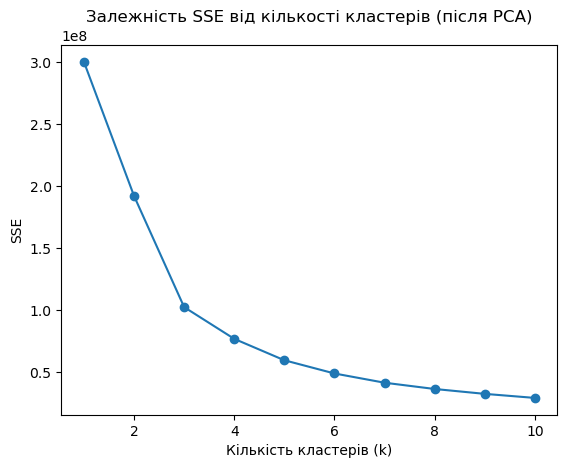

In [37]:
# Побудова графіка
plt.plot(k_values, sse2, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('SSE')
plt.title('Залежність SSE від кількості кластерів (після PCA)')
plt.show()

Оптимальна кількість кластерів, згідно з ліктевим методом, для датасету mnist, буде дорівнювати 3 (SSE = 1.0252003725757515 le8 (відповідає значенню 10^8 або 100,000,000). 
У цьому випадку, значення суми квадратів внутрішньокластерних відстаней (SSE), може бути великим числом в залежності від конкретних даних і кількості кластерів. SSE відображає міру віддаленості точок від центроїдів їхніх відповідних кластерів: чим менше SSE, тим краще (це твердження справедливе при застосуванні підходу PCA, при якому на першому етапі відбувається приведення всіх даних до одного масштабу).